In [31]:
#"Forward Stepwise Regression: Wine Quality Data—fwdStepwiseWine.py"
import numpy as np
from sklearn import datasets, linear_model
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.debugger import set_trace


In [14]:
# Data Reading
df=pd.read_csv("C:\Repository\machine_laerning\winequality-red.csv")

names=df.columns.to_list()
xList=df.iloc[:,:-1].to_numpy()
labels = df.iloc[:,-1:].to_numpy()

#read data into iterable

#divide attributes and labels into training and test sets

indices = range(len(xList))
xListTest = [xList[i] for i in indices if i%3 == 0 ]
xListTrain = [xList[i] for i in indices if i%3 != 0 ]
labelsTest = [labels[i] for i in indices if i%3 == 0]
labelsTrain = [labels[i] for i in indices if i%3 != 0]


In [17]:
def xattrSelect(x, idxSet):
    #takes X matrix and return subset containing columns in idxSet
    xOut = []
    for row in x:
        xOut.append([row[i] for i in idxSet])
    return(xOut)


In [18]:
#build list of attributes one-at-a-time - starting with empty
attributeList = []
index = range(len(xList[1]))
indexSet = set(index)
indexSeq = []
oosError = []

In [30]:
indexSet

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

Out of sample error versus attribute set size
[0.816206760584337, 0.7638643857209029, 0.7638643857209029, 0.7638281646287916, 0.7570245479523805, 0.755096811807613, 0.7402464046416789, 0.7095983105997428, 0.7078841064360093, 0.6739802095206913, 0.6569717576775211, 0.6573909869011334]

Best attribute indices
[0, 1, 1, 3, 4, 5, 6, 7, 8, 9, 10, 2]

Best attribute names
['fixed acidity', 'volatile acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'citric acid']


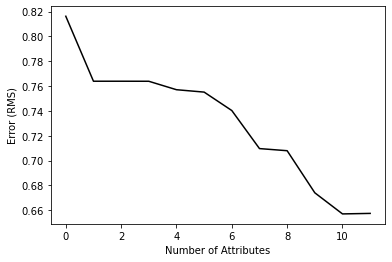

In [33]:
///'''''''''''for i in index:
    #set_trace()
    attSet = set(attributeList)
    #attributes not in list already
    attTrySet = indexSet - attSet
    #form into list
    attTry = [ii for ii in attTrySet]
    errorList = []
    attTemp = []
    #try each attribute not in set to see which one gives least oos error
    for iTry in attTry:
        attTemp = [] + attributeList
        attTemp.append(iTry)
        #use attTemp to form training and testing sub matrices
        xTrainTemp = xattrSelect(xListTrain, attTemp)
        xTestTemp = xattrSelect(xListTest, attTemp)
        #form into numpy arrays
        xTrain = np.array(xTrainTemp); yTrain = np.array(labelsTrain)
        xTest = np.array(xTestTemp); yTest = np.array(labelsTest)
        #use sci-kit learn linear regression
        wineQModel = linear_model.LinearRegression()
        wineQModel.fit(xTrain,yTrain)
        #use trained model to generate prediction and calculate rmsError
        rmsError = np.linalg.norm((yTest-wineQModel.predict(xTest)), 2)\
        /sqrt(len(yTest))
        errorList.append(rmsError)
        attTemp = []
        iBest = np.argmin(errorList)
        attributeList.append(attTry[iBest])
        oosError.append(errorList[iBest])
print("Out of sample error versus attribute set size" )
print(oosError)
print("\n" + "Best attribute indices")
print(attributeList)
namesList = [names[i] for i in attributeList]
print("\n" + "Best attribute names")
print(namesList)
#Plot error versus number of attributes
x = range(len(oosError))
plt.plot(x, oosError, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()

In [23]:
#Plot histogram of out of sample errors for best number of attributes
#Identify index corresponding to min value,
#retrain with the corresponding attributes
#Use resulting model to predict against out of sample data.
indexBest = oosError.index(min(oosError))
attributesBest = attributeList[1:(indexBest+1)]
#Define column-wise subsets of xListTrain and xListTest convert to numpy
xTrainTemp = xattrSelect(xListTrain, attributesBest)
xTestTemp = xattrSelect(xListTest, attributesBest)
xTrain = np.array(xTrainTemp); xTest = np.array(xTestTemp)


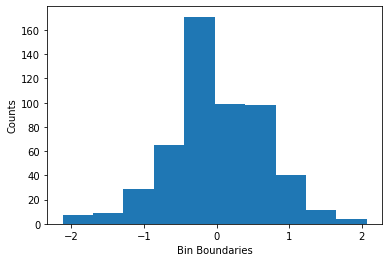

In [24]:
#train and plot error histogram
wineQModel = linear_model.LinearRegression()
wineQModel.fit(xTrain,yTrain)
errorVector = yTest-wineQModel.predict(xTest)
plt.hist(errorVector)
plt.xlabel("Bin Boundaries")
plt.ylabel("Counts")
plt.show()


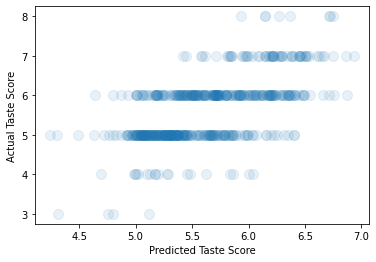

In [25]:
#scatter plot of actual versus predicted
plt.scatter(wineQModel.predict(xTest), yTest, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()